# Random Forest Estimator


## ¿Qué es el Modelo Random Forest?

El Random Forest es un método de aprendizaje supervisado que se utiliza tanto para clasificación como para regresión. Funciona creando múltiples árboles de decisión durante el entrenamiento y sacando la media de las predicciones de estos árboles para obtener un resultado más preciso y robusto.

### ¿Cómo Funciona?

1. **Selección de Muestras**: De los datos de entrenamiento, se seleccionan múltiples muestras aleatorias con reemplazo.
2. **Construcción de Árboles de Decisión**: Para cada muestra, se construye un árbol de decisión. Cada árbol es entrenado utilizando diferentes subconjuntos de características.
3. **Agregación de Resultados**: Para la clasificación, se toma el modo de las predicciones de todos los árboles. Para la regresión, se toma el promedio.

### Importando Paquetes

In [40]:
import os
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import io
import base64
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from IPython.display import display, HTML

### Visualización de datos

In [28]:
# Cargar los datos
data = load_iris()
X = data.data
y = data.target

##### Diagramas de Dispersión

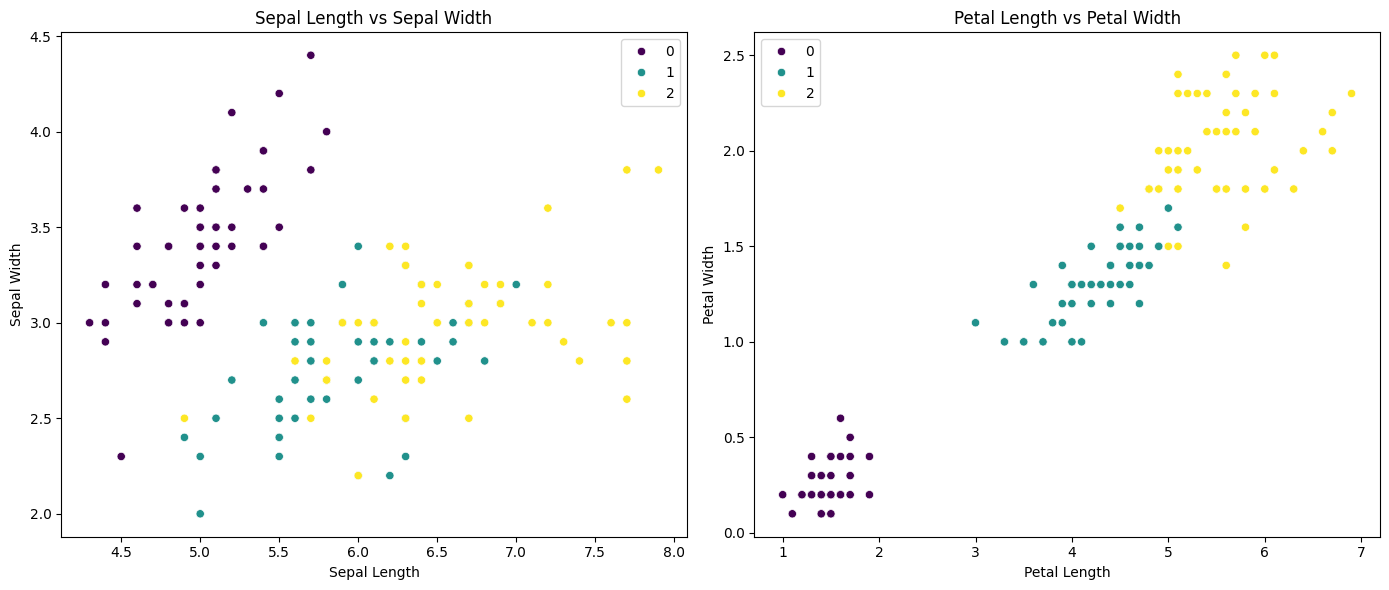

In [29]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette='viridis')
plt.title('Sepal Length vs Sepal Width')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

plt.subplot(1, 2, 2)
sns.scatterplot(x=X[:, 2], y=X[:, 3], hue=y, palette='viridis')
plt.title('Petal Length vs Petal Width')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

plt.tight_layout()
plt.show()

##### Histogramas

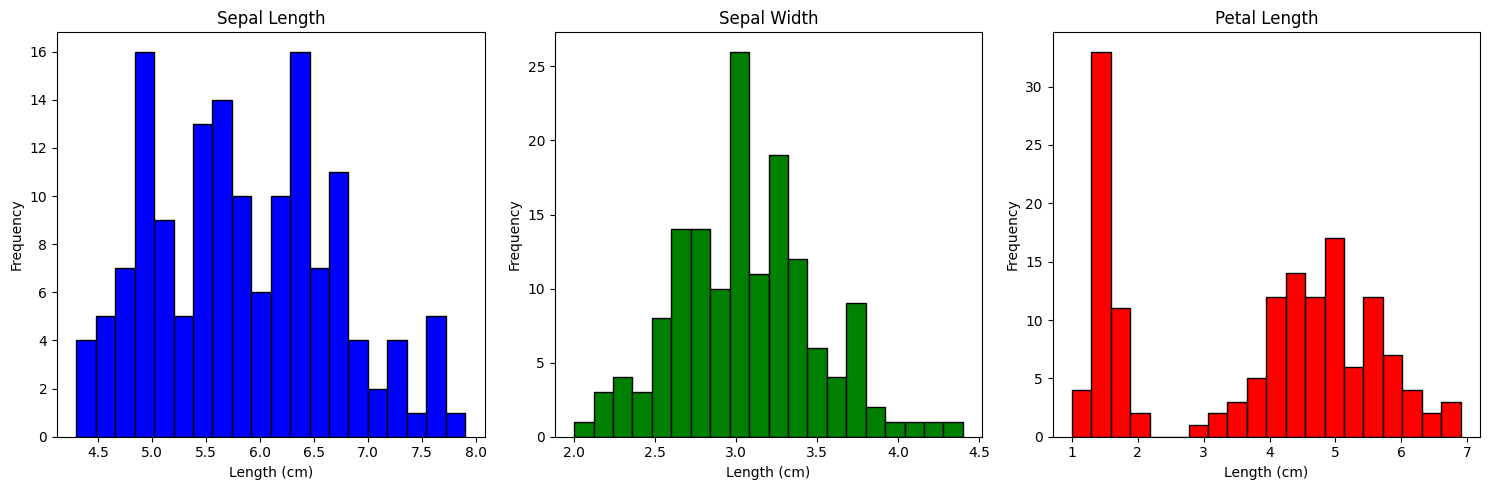

In [30]:
# Cargar el conjunto de datos de iris
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Crear subgráficos (3 histogramas uno al lado del otro)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Histogramas para cada característica
axes[0].hist(df['sepal length (cm)'], bins=20, color='blue', edgecolor='black')
axes[0].set_title('Sepal Length')

axes[1].hist(df['sepal width (cm)'], bins=20, color='green', edgecolor='black')
axes[1].set_title('Sepal Width')

axes[2].hist(df['petal length (cm)'], bins=20, color='red', edgecolor='black')
axes[2].set_title('Petal Length')

# Añadir etiquetas de ejes
for ax in axes:
    ax.set_xlabel('Length (cm)')
    ax.set_ylabel('Frequency')

# Mostrar los gráficos
plt.tight_layout()
plt.show()

### Estadísticas Descriptivas

{{< rawhtml >}}

<style>
  .dataframe {
    font-size: 12px;
    width: 80%;
    margin: auto;
    border-collapse: collapse;
  }
  .dataframe th, .dataframe td {
    padding: 8px;
    text-align: center;
  }
  .dataframe tr:nth-child(even) {
    background-color: #333;
  }
  .dataframe tr:nth-child(odd) {
    background-color: #444;
  }
  .dataframe th {
    background-color: #555;
    color: white;
    text-align: center;
  }
  .dataframe thead th {
    text-align: center;
  }
</style>

In [46]:
# Cargar el conjunto de datos de iris
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Calcular estadísticas descriptivas y transponer para un formato más legible
descriptive_stats = df.describe().transpose()

# Redondear los valores a 2 decimales
descriptive_stats_rounded = descriptive_stats.round(2)

# Convertir la tabla a HTML con estilo
html_table = descriptive_stats_rounded.to_html(classes='table table-striped table-bordered', border=0, float_format="{:.2f}".format)

# Mostrar la tabla HTML en el Jupyter Notebook
display(HTML(html_table))

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.00,5.84,0.83,4.30,5.10,5.80,6.40,7.90
sepal width (cm),150.00,3.06,0.44,2.00,2.80,3.00,3.30,4.40
petal length (cm),150.00,3.76,1.77,1.00,1.60,4.35,5.10,6.90
petal width (cm),150.00,1.20,0.76,0.10,0.30,1.30,1.80,2.50


{{< /rawhtml >}}

### Implementación en Python

A continuación, te mostramos cómo implementar un modelo Random Forest utilizando la biblioteca `scikit-learn`.


#### Dividir los datos en conjuntos de entrenamiento y prueba

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### Crear el modelo Random Forest

In [36]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
print(model)

RandomForestClassifier(random_state=42)


#### Entrenar el modelo

In [38]:
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

#### Realizar predicciones y Evaluar el Modelo

In [39]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy * 100:.2f}%')

Precisión del modelo: 100.00%
